<a href="https://colab.research.google.com/github/Lederback/Gridworld/blob/main/Gridworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gridworld

## Criação da Grid
Criando uma gird 8x8 e adicionando alguns, sendo eles:
- Areia: Com uma recompensa negativa de -8
- Montanha: Com uma recompensa negativa de -3

Os demais indices tem uma recompensa neutra de 0

In [ ]:
def gridCreation():
  import random

  grid = [];

  for i in range(0,8):
    auxArray = []
    auxValuesGrid = []
    for j in range(0, 8):
      rnd = random.randrange(20)

      if i == 0 and j == 0: auxArray.append(0)
      elif i == 7 and j == 7: auxArray.append(5)
      elif rnd > 18: auxArray.append(-8);
      elif rnd > 16: auxArray.append(-3);
      else: auxArray.append(0);

    grid.append(auxArray);

  return grid

## Atribuição de Valores
Definindo valores padrões para cada indice da grid, inicialmente todos o indices sendo definidos como 0, em outra função será definido realmente os valores ponderados para cada indice utilizando a politica.

In [ ]:
def valuesGridCreation():
  import random

  grid = [];

  for i in range(0,8):
    auxArray = []
    auxValuesGrid = []
    for j in range(0, 8):
      auxArray.append(0);

    grid.append(auxArray);

  return grid

## Grid Plot
Função que utiliza a biblioteca Matplotlib para criar uma representação visual da grid

In [ ]:
def getGridPlot(grid):
  import matplotlib.pyplot as plt

  fig, ax = plt.subplots()
  ax.imshow(grid)

## Gerar Recompensa
Para os campos comuns é definido um valor inicial de -0.05

In [ ]:
def getReward(grid, i, j):
  reward = grid[i][j];

  if (reward == 0):
    reward = -0.05;

  return reward;


## Calculo dos valores das ações

In [ ]:
def getActionsValues(valuesGrid, grid, i, j, gamma):
  up = 0;
  if (i + 1 <= 7):
    reward = getReward(grid, i + 1, j);

    up = (policy * (reward + (gamma * valuesGrid[i + 1][j])));
  else:
    reward = getReward(grid, i, j);
    up = (policy * reward);

  down = 0;
  if (i - 1 >= 0):
    reward = getReward(grid, i - 1, j);

    down = (policy * (reward + (gamma * valuesGrid[i - 1][j])));
  else:
    reward = getReward(grid, i, j);
    down = (policy * reward);

  right = 0;
  if (j + 1 <= 7):
    reward = getReward(grid, i, j + 1);

    right = (policy * (reward + (gamma * valuesGrid[i][j + 1])));
  else:
    reward = getReward(grid, i, j);
    right = (policy * reward);

  left = 0;
  if (j - 1 >= 0):
    reward = getReward(grid, i, j - 1);

    left = (policy * (reward + (gamma * valuesGrid[i][j - 1])));
  else:
    reward = getReward(grid, i, j);
    left = (policy * reward);

  return up + down + left + right;

## Calcula da Recompensas de Cada Estado

In [ ]:
def getStateRewards(theta, policy, gamma, delta, grid, valuesGrid):
  while (delta > theta):
    delta = 0;

    for i in range(0, 8):
      for j in range(0, 8):
        v = valuesGrid[i][j];

        actionsValues = getActionsValues(valuesGrid, grid, i, j, gamma);

        valuesGrid[i][j] = actionsValues;

        delta = max(delta, abs(v - valuesGrid[i][j]));

  return valuesGrid;

## Greedy Search
Nessa função é criado um algoritmo guloso para gerar um caminho do ponto incial(0, 0) da grid até o último ponto(7, 7)

In [ ]:
def greedySearch(grid, valuesGrid):
    path = [(0, 0)]
    i, j = 0, 0
    total_utility = 0
    explored_paths = []
    visited = set()

    while (i, j) != (7, 7):
        possible_moves = []

        if i + 1 < 8 and (i + 1, j) not in visited and grid[i + 1][j] >= 0:
            possible_moves.append(((i + 1, j), total_utility + valuesGrid[i + 1][j]))

        if i - 1 >= 0 and (i - 1, j) not in visited and grid[i - 1][j] >= 0:
            possible_moves.append(((i - 1, j), total_utility + valuesGrid[i - 1][j]))

        if j + 1 < 8 and (i, j + 1) not in visited and grid[i][j + 1] >= 0:
            possible_moves.append(((i, j + 1), total_utility + valuesGrid[i][j + 1]))

        if j - 1 >= 0 and (i, j - 1) not in visited and grid[i][j - 1] >= 0:
            possible_moves.append(((i, j - 1), total_utility + valuesGrid[i][j - 1]))

        if not possible_moves:
            if explored_paths:
                path = explored_paths.pop()
                i, j = path[-1]
                continue
            else:
                break

        next_move, total_utility = max(possible_moves, key=lambda x: x[1])

        path.append(next_move)
        visited.add(next_move)
        i, j = next_move

        explored_paths.append(list(path))

    return path


## Criar Grid do Caminho
Após gerado os passos necessários para sair do ponto incial para o final, esse função gera uma grid com os caminho gerado.

In [ ]:
def createPathingGrid(grid, bestPath):
  #actualStep

  for i in range(8):
    for j in range(8):
      for k in range(len(bestPath)):
        if i == bestPath[k][0] and j == bestPath[k][1]:
            grid[i][j] = 11

  return grid

## Implementação das Funções

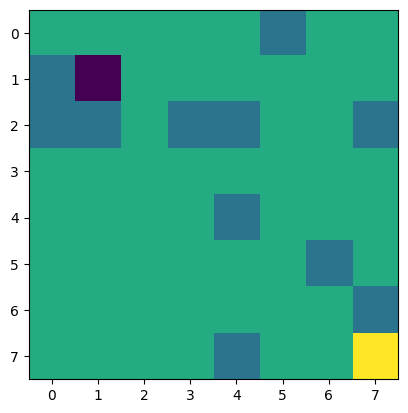

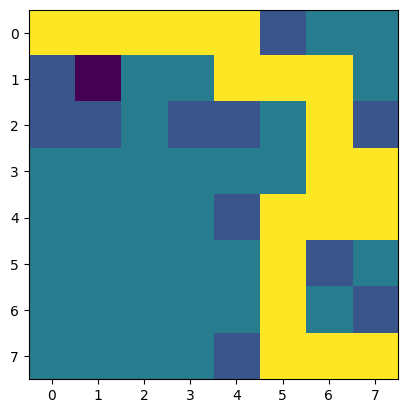

In [ ]:
grid = gridCreation();
valuesGrid = valuesGridCreation();

getGridPlot(grid);

theta = 0.01;
gamma = 0.9;
policy = 0.25;
delta = theta + 1;

rewardGrid = getStateRewards(theta, policy, gamma, delta, grid, valuesGrid);
bestPath = greedySearch(grid, rewardGrid)

gridPath = createPathingGrid(grid, bestPath)

getGridPlot(gridPath)